In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import numpy as np

In [28]:
df = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')

*C: Separate each section with more title and maybe add numeric lists*
*Also add a small description of the project you're working on*

# Describe Data set 
here we get a quick wiev on the dataset and it's context

In [29]:
df.head(5)

,datetime,close,amount,ex_symbol
0,2021-02-04,173.26,354292.0,l_sgld
1,2021-02-03,177.79,26805.0,l_sgld
2,2021-02-02,177.91,21356.0,l_sgld
3,2021-02-01,180.30,38422.0,l_sgld
4,2021-01-29,179.91,102532.0,l_sgld


In [30]:
df.describe()

,close,amount
count,11968.000000,1.196800e+04
mean,253.108282,1.041352e+05
std,385.863657,4.346516e+05
min,21.260000,1.000000e+00
25%,119.560000,3.008250e+03
50%,126.345000,1.163700e+04
75%,155.030000,5.586175e+04
max,1959.000000,1.708597e+07


# Exchange Traded Fund
here we can find information about the diffrent etf's and it's values

In [31]:
df['ex_symbol'].unique()

array(['l_sgld', 's_sgld', 'l_igln', 'l_xgld', 's_xgld', 'l_gbsx',
       'l_phau', 's_csgold', 'l_sgbs', 's_zgldus'], dtype=object)

In [32]:
df['ex_symbol'].nunique()

10

In [33]:
df["ex_symbol"].describe()

count      11968
unique        10
top       l_xgld
freq        1289
Name: ex_symbol, dtype: object

In [34]:
s = pd.Series(['l_sgld', 's_sgld', 'l_igln', 'l_xgld', 's_xgld', 'l_gbsx', 'l_phau', 's_csgold', 'l_sgbs', 's_zgldus'])
s.describe()

count         10
unique        10
top       s_xgld
freq           1
dtype: object

In [35]:
df["ex_symbol"].value_counts()

l_xgld      1289
l_sgld      1289
l_igln      1289
l_gbsx      1289
l_phau      1289
l_sgbs      1280
s_zgldus    1279
s_csgold    1279
s_sgld      1005
s_xgld       680
Name: ex_symbol, dtype: int64

*C: I think it's a good way to know how pd.DataFrame works with dictionaries but you already got this info from the block above*

In [36]:
exsymbol_df = pd.DataFrame( {     
"exsymbol" : ['l_gbsx', 'l_xgld', 'l_igln', 'l_sgld', 'l_phau', 'l_sgbs', 's_csgold', 's_zgldus', 's_sgld', 's_xgld'] ,
"value" : [1289, 1289, 1289, 1289, 1289, 1280, 1279, 1279, 1005, 680]
})
exsymbol_df.head()

,exsymbol,value
0,l_gbsx,1289
1,l_xgld,1289
2,l_igln,1289
3,l_sgld,1289
4,l_phau,1289


# matplotlib
here we get a overview of the amount and close in the same graph during the time interval

*C:Check again this graph, it is not possible to have close (closing price values measured in USD or other currency) and amount (number of shares from that ETF) in the same graph. Redo this one and separate them.*

*Also, I don't see that you applied pd.to_datetime to the x= datetime, how do you know it is in the right data type format?*

*This is not part of matplotlib but it uses some attributes such as plot. dataframe.plot is a good way to shortcut all the code related to matplotlib, but there are more options like grid, colormap, and many more, pls explore and add options.*

<AxesSubplot:xlabel='datetime'>

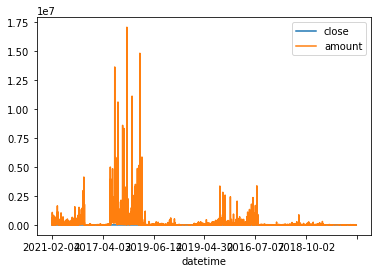

In [37]:
df.plot.line(x='datetime', y=['close', 'amount'])

# 
here we can see the amount normal distribution

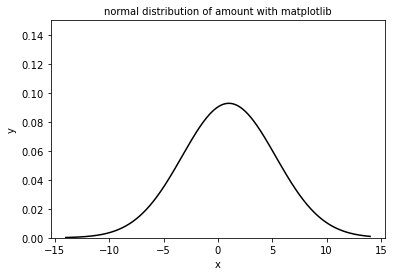

In [59]:
x_min = 1.0
x_max = 1.7

mean = 1.0
std = 4.3

x = np.arange(-14, 14, 0.0014)

y = scipy.stats.norm.pdf(x,mean,std)

plt.ylim(0,0.15)

plt.title('normal distribution of amount with matplotlib',fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("normal.png")

plt.plot(x,y, color='black')

*C: This is very interesting to see, but your are not using values from amount. Your y function is using x from an np.arrange. Try to relate this to close price and amount from your dataframe.*

*C: Additional comments
There is a great improvement, but I think you can actually get better by exploring the documentation for those modules such as pandas, matplotlib and many more, check out seaborn for example.*

*Something to add is your analysis, trends, mean, min or max for each ETF, I couldn't see that in your file and I believe you noticed some good stuff when playing with the dataset.

*Explore function creations to simplify code*

*Dont forget to check always data types and most important if your datetime column is in datetime64 format.*

*Add a heat map of correlations between closing prices for each ETF, this can be easily done with seaborn library.https://seaborn.pydata.org/*